## **Model Interpretability**



In [26]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [27]:
!pip install shap

In [28]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/College_Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/College_Data.csv')

In [30]:
# If 'Unnamed: 0' is indeed the correct name, you can drop it like this:
df = df.drop('Unnamed: 0', axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns including the 'Unnamed' one
# (Replace 'Unnamed: 0' with the actual name of the column if it's different)
categorical_cols = ['Private']

# Create a copy of the DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col])


In [32]:
features = df_encoded.columns.drop(['Grad.Rate'])  # Replace with actual target and unnecessary columns
target = 'Grad.Rate'

# Prepare the data for training
X = df_encoded[features]
y = df_encoded[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [63]:
# Retrieve the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Assuming features is the list of feature names used for X_train
print(f'Intercept: {intercept}')
for coef, feature in zip(coefficients, features):
    print(f'The coefficient for {feature} is {coef}')


Intercept: 36.45619011149533
The coefficient for Private is 3.3340150737488026
The coefficient for Apps is 0.001475182946429018
The coefficient for Accept is -0.0008276654899047615
The coefficient for Enroll is 0.002017943695692653
The coefficient for Top10perc is 0.03227342132255134
The coefficient for Top25perc is 0.14880181275336035
The coefficient for F.Undergrad is -0.000607205724589443
The coefficient for P.Undergrad is -0.0016907141249313915
The coefficient for Outstate is 0.000976255056192536
The coefficient for Room.Board is 0.0017776913528330595
The coefficient for Books is -0.0031111639442794703
The coefficient for Personal is -0.001669504631000695
The coefficient for PhD is 0.12269376842314396
The coefficient for Terminal is -0.10923276325530859
The coefficient for S.F.Ratio is 0.005207159487138418
The coefficient for perc.alumni is 0.29714842968870553
The coefficient for Expend is -0.00046902010137786867


In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

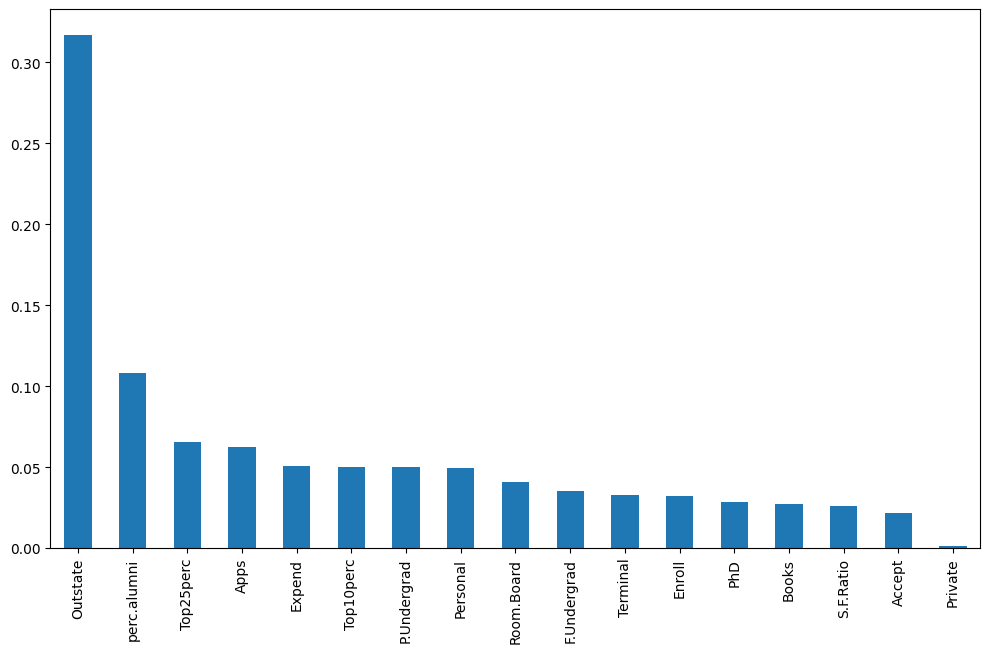

In [65]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df[features].columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances
f_importances.plot(kind='bar', figsize=(12,7))

# Show the plot
plt.show()


In [66]:
from sklearn.metrics import mean_squared_error  # or accuracy_score for classification

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the test error
error = mean_squared_error(y_test, y_pred)  # Use accuracy_score for classification tasks
print(f'Test MSE: {error}')  # Or 'Test Accuracy' for classification


Test MSE: 108.01906602564104


In [34]:
!pip install h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 hours 24 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_yhc00m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.160 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [35]:
# Then adjust the path to where the file is located in your Google Drive
df_encoded = h2o.import_file("/content/drive/My Drive/College_Data.csv")


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [36]:
response = "Grad.Rate"
predictors = list(df_encoded.columns)
predictors.remove('Grad.Rate')

In [38]:
# Split into train & test
splits = df_encoded.split_frame(ratios=[0.8], seed=1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=response, training_frame=train)

AutoML progress: |
21:30:26.718: _train param, Dropping bad and constant columns: [C1]

████
21:30:32.669: _train param, Dropping bad and constant columns: [C1]

█
21:30:33.164: _train param, Dropping bad and constant columns: [C1]

██
21:30:34.331: _train param, Dropping unused columns: [C1]
21:30:34.456: _train param, Dropping bad and constant columns: [C1]

████
21:30:38.983: _train param, Dropping bad and constant columns: [C1]

█████
21:30:43.344: _train param, Dropping bad and constant columns: [C1]

█
21:30:44.990: _train param, Dropping bad and constant columns: [C1]

██
21:30:46.353: _train param, Dropping bad and constant columns: [C1]

██
21:30:47.894: _train param, Dropping unused columns: [C1]
21:30:48.27: _train param, Dropping unused columns: [C1]
21:30:48.186: _train param, Dropping bad and constant columns: [C1]

██
21:30:50.291: _train param, Dropping bad and constant columns: [C1]

████
21:30:53.571: _train param, Dropping bad and constant columns: [C1]

███
21:30:55

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/28
# GBM base models (used / total),3/13
# XGBoost base models (used / total),0/9
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),2/3
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [39]:
# Get the best model from the leaderboard
best_model = aml.leader

# Get the model ID of the best model
best_model_id = best_model.model_id

# Get the model type of the best model
best_model_type = best_model.algo

print("Best Model ID:", best_model_id)
print("Best Model Type:", best_model_type)

Best Model ID: StackedEnsemble_AllModels_3_AutoML_2_20240317_213026
Best Model Type: stackedensemble


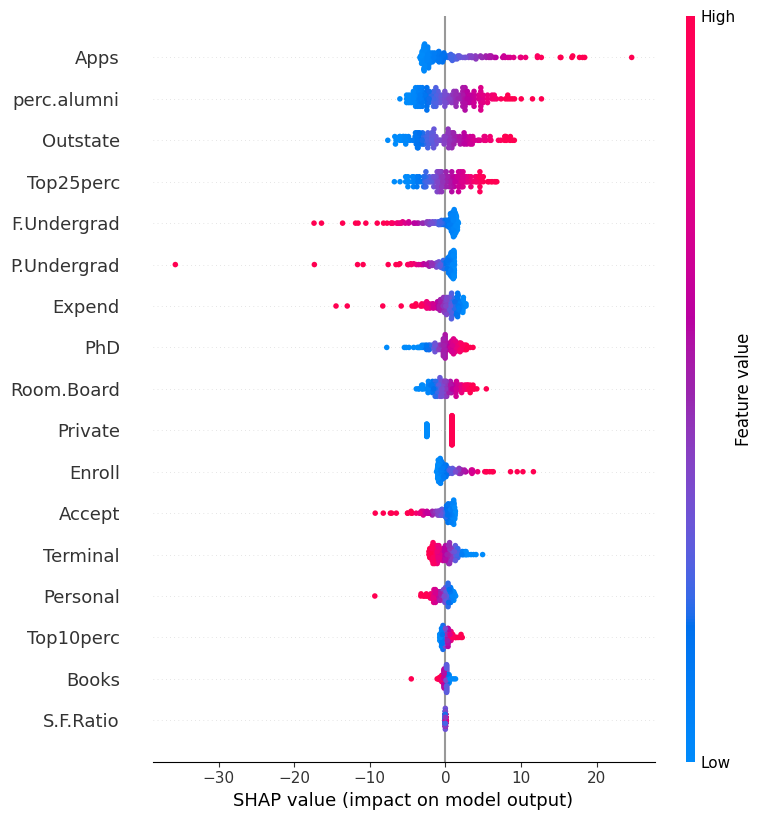

In [70]:
import shap

# Assuming your model is a linear regression model
explainer = shap.LinearExplainer(model, X_train)  # X_train can be the training data or a representative sample

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=features)


1. The impact of the features is consistent across all predictions because the relationship is linear. This is indicated by the vertical alignment of SHAP values for each feature.

2. The length of the "bar" indicates the magnitude of the impact. Features on the top are likely to have the most significant overall impact on the model output.


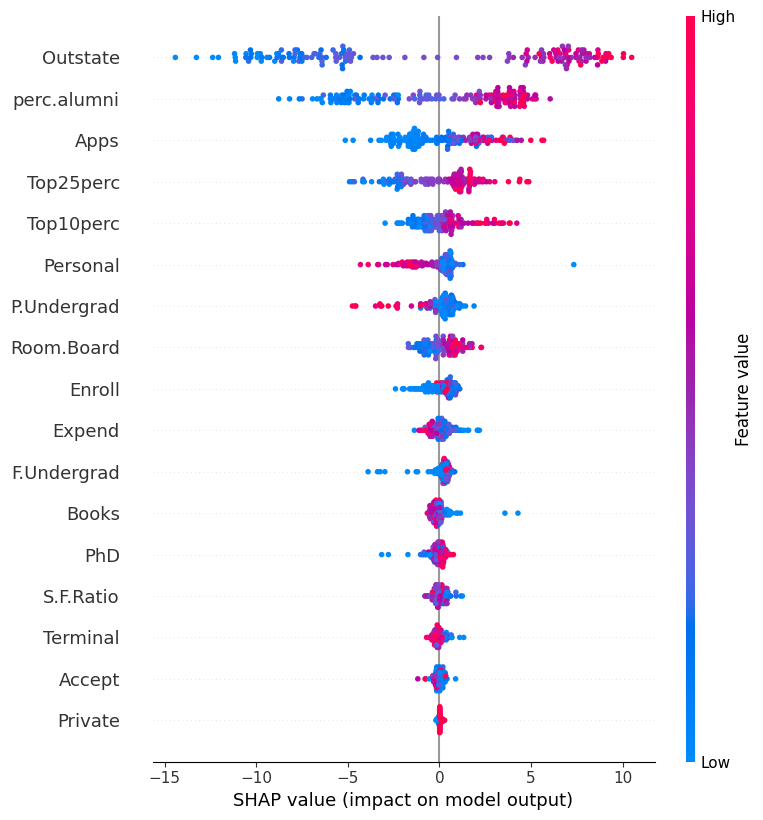

In [73]:
import shap
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification tasks
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you have already preprocessed your data
# Define your features and target variable
features = df_encoded.drop(columns='Grad.Rate').columns
X = df_encoded[features]
y = df_encoded['Grad.Rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Create the SHAP Tree Explainer using the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot of the SHAP values for all features across all test samples
shap.summary_plot(shap_values, X_test, feature_names=features)

# Visualize the SHAP values for the first prediction
shap.initjs()  # Required for JS visualization in Jupyter notebooks and labs
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


1. Compared to the linear model, the Random Forest model captures non-linearities and interactions between features. This is reflected in the wider spread of SHAP values for each feature.
2. The Random Forest model reveals that certain features have a high impact on the prediction only in the context of specific other features values.
3. The range of SHAP values across observations for a single feature would generally be broader than in the linear model, reflecting the model's ability to adapt to the data's structure.

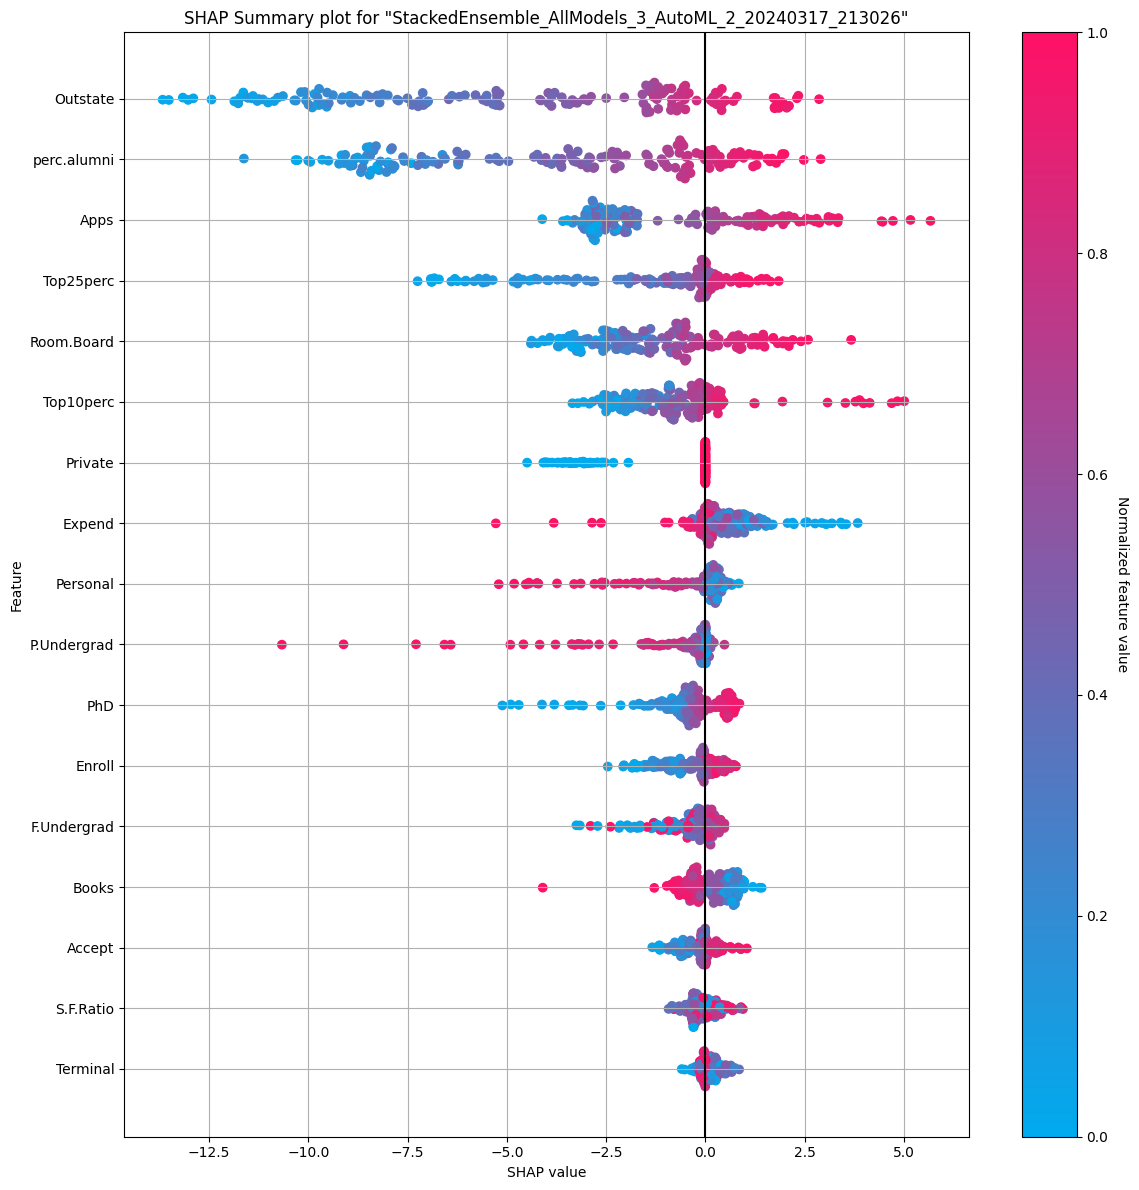

In [40]:
# Assuming 'train' is your H2OFrame containing the training data
# This will split your data into a 1% sample and the rest, you can adjust the ratios as needed
splits = train.split_frame(ratios=[0.01], seed=42)

# Use the smaller split as the background dataset for SHAP calculations
background = splits[0]

shapr_plot = best_model.shap_summary_plot(test, background_frame=background)

1. The SHAP values from the AutoML model represent an aggregate effect of multiple models, including potentially both linear and complex tree-based models.
2. The spread of SHAP values can be wider than individual models due to the ensemble's blending of different modeling approaches.
3. The values present a more robust understanding of feature effects across the diverse data landscape, as ensemble models tend to generalize better

## **Summary**

1) Fit a linear model and interpret the regression coefficients

1. Private: 3.3340
Being a private institution is associated with a 3.3340 percentage point increase in the graduation rate, all else being equal.
2. Apps: 0.0015
For each additional application received, the graduation rate increases by 0.0015 percentage points, all else being equal.
3. Accept: -0.0008
For each additional acceptance, the graduation rate decreases by 0.0008 percentage points, holding all else constant.
4. Enroll: 0.0020
For each additional student enrolled, the graduation rate increases by 0.0020 percentage points, all else being equal.
5. Top10perc: 0.0323
For each percentage point increase in the proportion of new students from the top 10% of their high school class, the graduation rate increases by 0.0323 percentage points, all else being equal.
6. Top25perc: 0.1488
For each percentage point increase in the proportion of new students from the top 25% of their high school class, the graduation rate increases by 0.1488 percentage points, all else being equal.
7. F.Undergrad: -0.0006
For each additional full-time undergraduate, the graduation rate decreases by 0.0006 percentage points, all else being equal.
8. P.Undergrad: -0.0017
For each additional part-time undergraduate, the graduation rate decreases by 0.0017 percentage points, all else being equal.
9. Outstate: 0.0010
For each additional dollar in out-of-state tuition, the graduation rate increases by 0.0010 percentage points, all else being equal.
10. Room.Board: 0.0018
For each additional dollar in room and board costs, the graduation rate increases by 0.0018 percentage points, all else being equal.
11. Books: -0.0031
For each additional dollar spent on books, the graduation rate decreases by 0.0031 percentage points, all else being equal.
12. Personal: -0.0017
For each additional dollar spent on personal expenses, the graduation rate decreases by 0.0017 percentage points, all else being equal.
13. PhD: 0.1227
For each percentage point increase in the proportion of faculty with PhDs, the graduation rate increases by 0.1227 percentage points, all else being equal.
14. Terminal: -0.1092
For each percentage point increase in the proportion of faculty with terminal degrees, the graduation rate decreases by 0.1092 percentage points, all else being equal.
15. S.F.Ratio: 0.0052
For each unit increase in the student-to-faculty ratio, the graduation rate increases by 0.0052 percentage points, all else being equal.
16. perc.alumni: 0.2971
For each percentage point increase in the proportion of alumni who donate, the graduation rate increases by 0.2971 percentage points, all else being equal.
17. Expend: -0.0005
For each additional dollar of instructional expenditure per student, the graduation rate decreases by 0.0005 percentage points, all else being equal.

2) Fit a tree-based model and interpret the nodes

Random Forest Model

1. Outstate: This feature has the highest importance among all the features. It suggests that the out-of-state tuition fees are the most significant predictor of the target variable, which could be the graduation rate or another key outcome for the institutions in your dataset.

2. perc.alumni: The percentage of alumni who donate is the second most important feature. A higher importance here could mean that institutions with a higher alumni donation rate might also have other positive outcomes that are associated with the target variable.
3. Top25perc: This feature represents the percentage of students from the top 25% of their high school class. Its importance indicates it's a strong predictor, possibly suggesting that institutions with a higher proportion of top students perform differently or better in the context of the target variable.
4. Apps: The number of applications received by the institution is another important feature. This could reflect the popularity or selectiveness of the institution, which might be related to the target variable.

The other features show varying degrees of importance, with features like 'Enroll', 'PhD', 'Books', 'S.F.Ratio', 'Accept', and 'Private' having lesser importance in this particular model.

3) Use auto ml to find the best model

1. Best Model ID: StackedEnsemble_AllModels_3_AutoML_2_20240317_213026
2. Best Model Type: stackedensemble

4) Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

Comparison:
1. Spread of SHAP Values: The AutoML model likely shows a wider spread in SHAP values compared to the linear model, indicating a more detailed understanding of feature effects.
2. Feature Impact: Some features appear more or less important across different models, reflecting the modeling approach.
3. Outliers: Outlier SHAP values can indicate unusual or influential observations in the data.





## **References and Licensing:**
References:

1. H20.ai documentation
2. Kaggle documentation
3. Sckit learn documentation

MIT License

Copyright (c) 2024 Vishruthtv30

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
